# Spam  Email Classifier

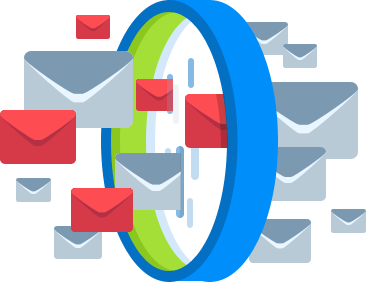

**Problem statement** :Segragate the input emails into spam and not spam

Steps:
1. create the dataset.
2. Tockenize
3. Build the model
4. Train the model
5. Make predictions.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
spam_df=pd.read_csv("/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv")
spam_df.head()

In [ ]:
X_text=spam_df["text"]
type(X_text)
X_text.head()

In [ ]:
y_label=spam_df["label"]
y_label.head()

In [ ]:
# Visialization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# Barplot describes the count of the class labels
plt.figure(figsize = (12, 6))
sns.countplot(data = spam_df, x = 'label');

**Checking null values**

In [ ]:
y_label[y_label.isnull()].count()

#  Create training and test sets

In [ ]:
X_text_train, X_text_test, y_label_train, y_label_test = train_test_split(X_text,
                                                      y_label, 
                                                    test_size=0.33,
                                                    random_state=53)
(X_text_train.shape),(X_text_test.shape),(y_label_train.shape),(y_label_test.shape)

#  Initialize a TFIDFVectorizer object: TFIDF_vectorizer and remove the stop words

In [ ]:
tfIdfVecorizer=TfidfVectorizer(stop_words='english')
tfIdfVecorizer

# Transform the training data using only the 'text' column values: count_train 

In [ ]:
count_train=tfIdfVecorizer.fit_transform(X_text_train)
count_train

In [ ]:
tfIdfVecorizer.get_feature_names()[0:10]

In [ ]:
len(tfIdfVecorizer.get_stop_words())

In [ ]:
tfIdfVecorizer.get_stop_words()

In [ ]:
count_test=tfIdfVecorizer.transform(X_text_test)
count_test

# Train and test a DecisonTreeClassifier model using the TFIDF Vectorizer data.


# creating object for DecisionTreeClassifier class

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

In [ ]:
model.fit(count_train,y_label_train)
label_pred = model.predict(count_test)

In [ ]:
score=accuracy_score(y_label_test,label_pred)
score

In [ ]:
con=confusion_matrix(y_label_test,label_pred)
con

# MultinominalNB Classifier

In [ ]:
navie_classifier=MultinomialNB()
##Fit the classifier to the training data
navie_classifier.fit(count_train,y_label_train)

In [ ]:
## predict the data
label_pred=navie_classifier.predict(count_test)
label_pred

In [ ]:
score=accuracy_score(y_label_test,label_pred)
score

# Confusion Matrix

In [ ]:
con=confusion_matrix(y_label_test,label_pred)
con

# Classification Report

In [ ]:
print(classification_report(y_label_test,label_pred))


In [ ]:
cmat = confusion_matrix(y_label_test, label_pred)
plt.figure(figsize = (6, 6))
sns.heatmap(cmat, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

# Pickling of Model and vectorizer

In [ ]:
from joblib import dump, load
dump(model, 'model.joblib')
dump(tfIdfVecorizer, 'tfIdfVecorizer.joblib')

In [ ]:
model = load('model.joblib')
vect = load('tfIdfVecorizer.joblib')

In [ ]:
count_test=vect.transform(X_text_test)
label_pred=model.predict(count_test)
score=accuracy_score(y_label_test,label_pred)
score

# Multi classifier comparison

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(count_train,y_label_train)
    name = clf.__class__.__name__
    train_predictions = clf.predict(count_test)
    acc = accuracy_score(y_label_test, train_predictions)
   
       
    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)
    log = log.append(log_entry)

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

# Testing the input

In [ ]:
input=spam_df.iloc[3:4,:]
input

In [ ]:
decisionTreeModel = load('model.joblib')
tfIdfVecorizer = load('tfIdfVecorizer.joblib')
count_test=tfIdfVecorizer.transform(input['text'])
# count_test=tfIdfVecorizer.transform(['I am input'])
## predict the data
label_pred=decisionTreeModel.predict(count_test)
if label_pred[0]=="spam":
  print("This is a spam email")
else:
  print("This is a ham email")